In [56]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [157]:
class Model(object):
    def train(self, samples, labels, steps=1): pass


class LinearModel(Model):
    def __init__(self, x_shape, y_shape, model_dir=None, learning_rate=0.01):
        self.W = tf.Variable(np.zeros((1, x_shape[1])), dtype=tf.float32, name='W')
        self.b = tf.Variable([0], dtype=tf.float32, name='b')
        
        self.x = tf.placeholder(tf.float32, shape=x_shape, name='x')
        self.y = tf.placeholder(tf.float32, shape=y_shape, name='y')
        self.m = tf.placeholder(tf.float32, shape=(), name='m')

        self.model = tf.transpose(self.W) * self.x + self.b
        self.loss = (1 / (self.m * 2)) * tf.reduce_sum(tf.square(self.model - self.y))
        self.optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        self.minimize = self.optimizer.minimize(self.loss)
        
        self.model_dir = model_dir
    
    def train(self, samples, labels, steps=1):
        init = tf.global_variables_initializer()
        loss = []
        saver = tf.train.Saver()
        with tf.Session() as session:
            session.run(init)
            W = session.run(self.W)
            b = session.run(self.b)
            for _ in range(steps):
                t, l, W, b = session.run([self.minimize, self.loss, self.W, self.b],
                                         feed_dict={
                                             self.x: samples, 
                                             self.y: labels, 
                                             self.m: samples.shape[0]
                                         })
                loss.append(l)
            
            if self.model_dir is not None:
                saver.save(session, self.model_dir)
        return {'loss': loss, 'W': W, 'b': b}
    
    def predict(self, input):
        saver = tf.train.Saver()
        with tf.Session() as session:
            if self.model_dir is not None:
                saver.restore(session, self.model_dir)
            return session.run([self.model], feed_dict={self.x: input})

X range: [0 0], [9 9]
X std range: [-1.5666989 -1.5666989], [ 1.5666989  1.5666989]
X norm range: [ 0.  0.], [ 1.  1.]


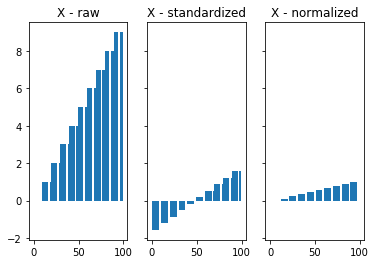

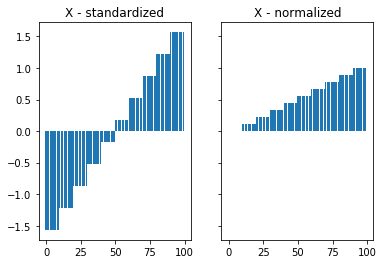

In [149]:
n = 10
X = np.array([[y, x] for y in range(n) for x in range(n)])
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X_norm = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))
Y = np.array([[255 if i % 2 == 0 else 0] for i in range(X.shape[0])])

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
height = range(n * n)
ax1.bar(height, X[:, 0])
ax1.set_title('X - raw')
ax2.bar(height, X_std[:, 0])
ax2.set_title('X - standardized')
ax3.bar(height, X_norm[:, 0])
ax3.set_title('X - normalized')

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.bar(height, X_std[:, 0])
ax1.set_title('X - standardized')
ax2.bar(height, X_norm[:, 0])
ax2.set_title('X - normalized')

print('X range: %s, %s' % (X.min(axis=0), X.max(axis=0)))
print('X std range: %s, %s' % (X_std.min(axis=0), X_std.max(axis=0)))
print('X norm range: %s, %s' % (X_norm.min(axis=0), X_norm.max(axis=0)))

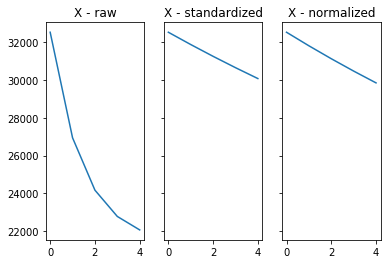

In [83]:
steps = 5

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True)
model = LinearModel((None, X.shape[1]), (None, Y.shape[1]), './sessions/model')
model_std = LinearModel((None, X.shape[1]), (None, Y.shape[1]), './sessions/model_std')
model_norm = LinearModel((None, X.shape[1]), (None, Y.shape[1]), './sessions/model_norm')

res = model.train(X, Y, steps=steps)
ax1.plot(res['loss'])
ax1.set_title('X - raw')
res = model_std.train(X_std, Y, steps=steps)
ax2.plot(res['loss'])
ax2.set_title('X - standardized')
res = model_std.train(X_norm, Y, steps=steps)
ax3.plot(res['loss'])
ax3.set_title('X - normalized')

plt.show()

# print(model.predict(X))
# print(model.predict(X_std))
# print(Y)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


/usr/local/lib/python3.6/site-packages/matplotlib/colors.py:823: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/usr/local/lib/python3.6/site-packages/numpy/ma/core.py:2809: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


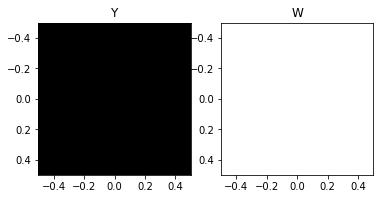

In [171]:
n = 1
x = np.zeros((n**2, n**2))
np.fill_diagonal(x, 1)
y = np.array([i / 10 for i in range(x.shape[0])]).reshape((x.shape[0], 1))
model = LinearModel((None, x.shape[1]), (None, Y.shape[1]), None)
out = model.train(x, y, steps=3)

_, (ax1, ax2) = plt.subplots(1, 2)

w = np.array(out['W'])
w = (w - np.min(w)) / (np.max(x) - np.min(x))
ax1.imshow(y.reshape((n, n)), cmap='gray')
ax1.set_title('Y')
ax2.imshow(w.reshape((n, n)), cmap='gray')
ax2.set_title('W')

[ 0.          0.00247207  0.00494413  0.00741619]


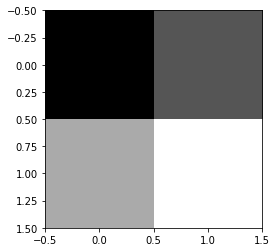

In [160]:
w = np.array([-0.00060266,  0.00186941,  0.00434147,  0.00681353])
w = (w - np.min(w)) / (np.max(x) - np.min(x))
print(w)
plt.imshow(w.reshape((2,2)), cmap='gray')